In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from scipy import stats

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    auc,
    roc_curve
)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import pylab as pl


/Users/tracyzhou/git/data-processing/venv36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tracyzhou/git/data-processing/venv36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# read in data

In [ ]:
# read from a dictionary 

data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data)

df.head()

In [ ]:
# read from a list of  dicts
data = [{'Geeks': 'dataframe', 'For': 'using', 'geeks': 'list'}, 
        {'Geeks':10, 'For': 20, 'geeks': 30}]  
df1 = pd.DataFrame(data)
df1.head()

# create index 
df2 = pd.DataFrame(data, index = ['ind1', 'ind2'])
df2.head()

In [2]:
# from https://www.kaggle.com/c/titanic/data
titanic_gender_submission = pd.read_csv('./data/titanic/gender_submission.csv')
titanic_test = pd.read_csv('./data/titanic/test.csv')
titanic_train = pd.read_csv('./data/titanic/train.csv')

In [ ]:
titanic_gender_submission.describe()

In [ ]:
titanic_gender_submission.info()

In [ ]:
titanic_test.describe()

In [ ]:
titanic_train.describe()

In [3]:
titanic_test_full_set = pd.merge(titanic_test, titanic_gender_submission, on = 'PassengerId', how = 'left')

titanic_test_full_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
# read the data from an url
# url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
# titanic = pd.read_csv(url)
# titanic.head()

In [ ]:
# # organize and name the columns
# titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
# titanic.head()

In [4]:
titanic = titanic_train

# describe the table

In [ ]:
titanic.describe()

In [ ]:
titanic.info()

In [5]:
# check null values

titanic.isnull().sum() # pretty much "info" does it too

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# drop cabin because it's not useful

titanic.drop(['Cabin'], inplace = True, axis = 1)

In [7]:
titanic.sort_values('Pclass').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,C


In [8]:
a = (titanic['Pclass'].value_counts())
print(type(a))
print(a)

# and i want to see which is the highest count
a.sort_values(ascending = False)

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
titanic['Fare'].nunique()

248

In [10]:
titanic[titanic['Pclass'].isin(['1', '2'])].count()

PassengerId    400
Survived       400
Pclass         400
Name           400
Sex            400
Age            359
SibSp          400
Parch          400
Ticket         400
Fare           400
Embarked       398
dtype: int64

In [11]:
titanic[titanic.Sex == 'male'].groupby(['Survived', 'Pclass']).agg(
{
    'Age':['count', 'mean'], 
    'Fare': 'mean'
}
    
)

Age                  Fare
                count       mean       mean
Survived Pclass                            
0        1         61  44.581967  62.894910
         2         84  33.369048  19.488965
         3        215  27.255814  12.204469
1        1         40  36.248000  74.637320
         2         15  16.022000  21.095100
         3         38  22.274211  15.579696

In [13]:
# if I want to create an additional column based on existing columns
titanic['male_binary'] = (titanic['Sex'] == 'male').astype('int')
# titanic_data.fillna({'male_binary': 0})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [14]:
# or use get dummy

titanic['get_dummy_male'] = pd.get_dummies(titanic['Sex'], drop_first=True) # drop_firstbool, default False
# Whether to get k-1 dummies out of k categorical levels by removing the first level.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male_binary,get_dummy_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


## how to chi-square test crosstabs

In [15]:
contingency_tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
contingency_tab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [16]:
type(contingency_tab)

pandas.core.frame.DataFrame

In [17]:
from scipy.stats import chi2_contingency

chi2_contingency(np.array(contingency_tab))

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

## plots

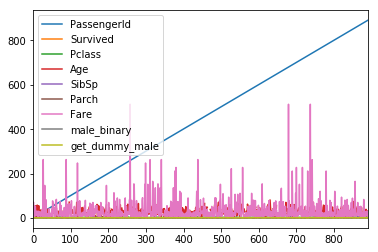

In [18]:
titanic.plot()

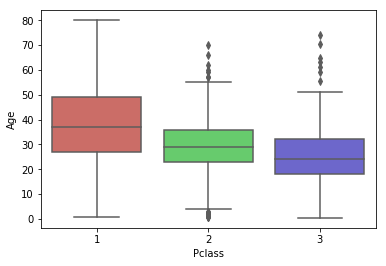

In [19]:
sb.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')


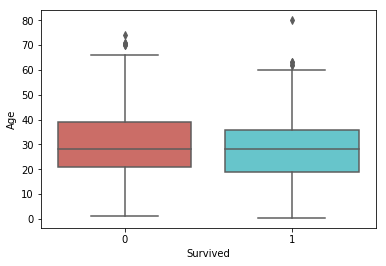

In [20]:
sb.boxplot(x='Survived', y='Age', data=titanic, palette='hls')


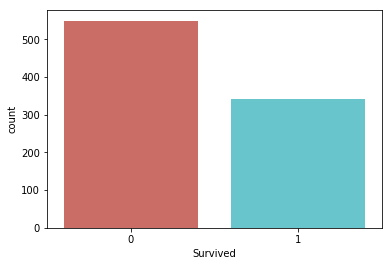

In [21]:
# check the target variable 'Survived' is binary 
sb.countplot(x='Survived',data=titanic, palette='hls')


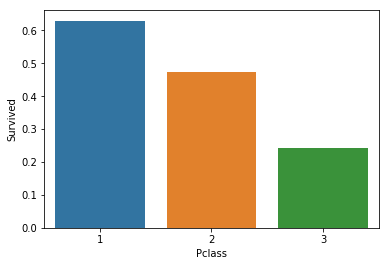

In [22]:
df = titanic.groupby('Pclass').agg({'Survived': 'mean'}).reset_index()
sb.barplot(x='Pclass', y = 'Survived', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11853deb8>,
      dtype=object)

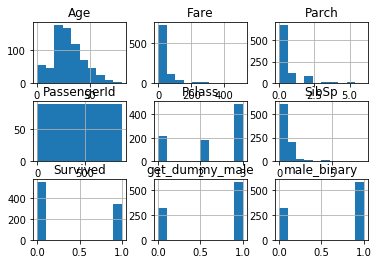

In [23]:
titanic.hist()

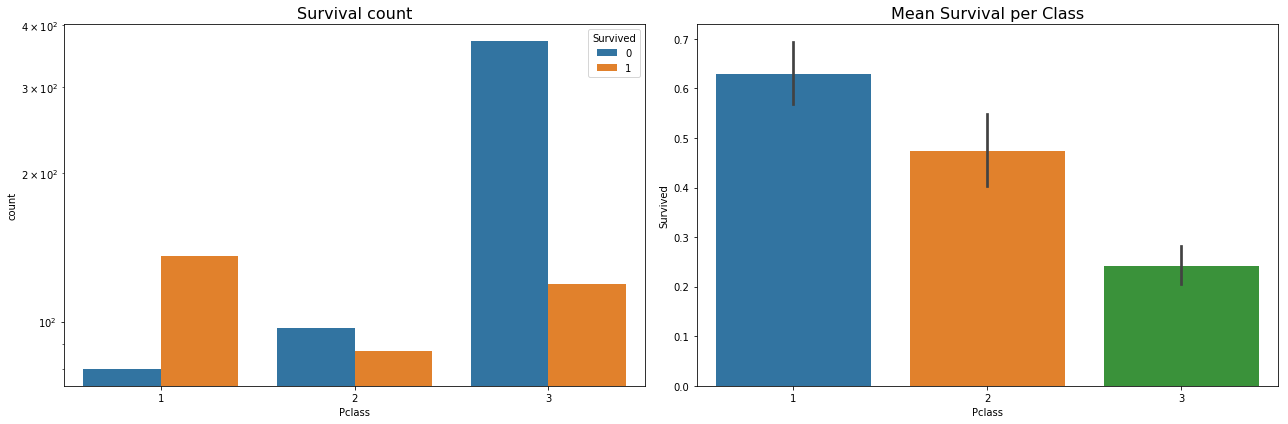

In [24]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sb.countplot(x='Pclass', hue='Survived', data=titanic, ax=ax[0])
ax[0].set_title('Survival count', fontsize=16)
ax[0].set_yscale('log')

sb.barplot(x='Pclass', y='Survived', data=titanic, ax=ax[1]);
ax[1].set_title('Mean Survival per Class', fontsize=16)
plt.tight_layout()
plt.show()



bonus, how to join tables https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

pd.concat([df_a, df_b]) # concat length wise
pd.concat([df_a, df_b], axis = 1) # concat width wise

pd.merge(df_new, df_n, on='subject_id', how='outer')
pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id', how='outer')

## handle missing values

In [ ]:
# # drop the meanings columns
# titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)

# titanic.groupby('Pclass').mean()

In [ ]:
# def age_approx(cols):
#     Age = cols[0]
#     Pclass = cols[1]
    
#     if pd.isnull(Age):
#         if Pclass == 1:
#             return 37
#         elif Pclass == 2:
#             return 29
#         else:
#             return 24
#     else:
#         return Age
    
# titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
# titanic_data.isnull().sum()


In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male_binary,get_dummy_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [26]:
# eventually drop missing values
titanic.dropna(inplace=True)
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
male_binary       0
get_dummy_male    0
dtype: int64

In [43]:
titanic.shape

(712, 11)

# models! 

## first. let's clean up the data 

### dummy the variables

In [27]:
gender = pd.get_dummies(titanic['Sex'], drop_first=True)
embark_location = pd.get_dummies(titanic['Embarked'], drop_first=True)
titanic.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
titanic_dmy = pd.concat([titanic, gender, embark_location], axis=1)

In [28]:
titanic_dmy.shape

(712, 14)

In [ ]:
# titanic_dmy.fillna({"Q":0, "S": 0, 'male': 0}, inplace=True).head() 

# not necessary

### check correlation

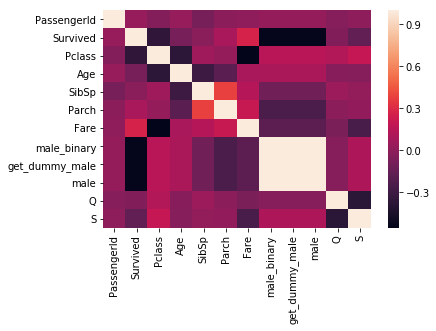

In [29]:
# just some checkings before model deployment

sb.heatmap(titanic_dmy.corr())  


In [30]:
titanic_dmy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_binary,get_dummy_male,male,Q,S
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655,0.024674,0.024674,0.024674,-0.027045,0.004605
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.536762,-0.536762,-0.536762,-0.048966,-0.159015
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.150826,0.150826,0.150826,0.131989,0.197831
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.099037,0.099037,0.099037,-0.021693,-0.025431
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.106296,-0.106296,-0.106296,0.051331,0.018968
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.249543,-0.249543,-0.249543,-0.009417,0.013259
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.182457,-0.182457,-0.182457,-0.062346,-0.250994
male_binary,0.024674,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,1.000000,1.000000,1.000000,-0.027256,0.109078
get_dummy_male,0.024674,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,1.000000,1.000000,1.000000,-0.027256,0.109078
male,0.024674,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,1.000000,1.000000,1.000000,-0.027256,0.109078


In [31]:
# make sure the right columns are selected
# drop Fare because it's highly correlated with Pclass

titanic_dmy_dropped_correlation = titanic_dmy[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]

In [ ]:
# or do this
# titanic_dmy.drop(['Fare', 'get_dummy_male'], axis=1, inplace=True)

### check for class imbalance

In [32]:
titanic_dmy_dropped_correlation.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [33]:
titanic_dmy_dropped_correlation['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

eh. it might be okay. but let's say we want to resample the data

https://elitedatascience.com/imbalanced-classes

In [34]:
# UPSAMPLE DATA!!!


from sklearn.utils import resample

# Separate majority and minority classes

df = titanic_dmy_dropped_correlation.copy()

df_majority = df[df['Survived']==0]
df_minority = df[df['Survived']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=424,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Survived'].value_counts()

1    424
0    424
Name: Survived, dtype: int64

In [ ]:
df_upsampled.head()

In [35]:
# DOWNSAMPLE DATA!!!

df = titanic_dmy_dropped_correlation.copy()


df_majority = df[df['Survived']==0]
df_minority = df[df['Survived']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=288,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['Survived'].value_counts()

1    288
0    288
Name: Survived, dtype: int64

In [ ]:
df_downsampled.head()

### check the dataset size is sufficient 


In [37]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 190
Data columns (total 8 columns):
Survived    848 non-null int64
Pclass      848 non-null int64
Age         848 non-null float64
SibSp       848 non-null int64
Parch       848 non-null int64
male        848 non-null uint8
Q           848 non-null uint8
S           848 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 42.2 KB


In [42]:
df_upsampled.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
4,0,3,35.0,0,0,1,0,1
6,0,1,54.0,0,0,1,0,1
7,0,3,2.0,3,1,1,0,1
12,0,3,20.0,0,0,1,0,1


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_upsampled['Age'] = scaler.fit_transform(df_upsampled.Age.values.reshape(-1, 1))


In [46]:
df_upsampled.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,-0.512251,1,0,1,0,1
4,0,3,0.399814,0,0,1,0,1
6,0,1,1.732832,0,0,1,0,1
7,0,3,-1.915427,3,1,1,0,1
12,0,3,-0.652568,0,0,1,0,1


## separate training and test sets

In [47]:
X = df_upsampled.ix[:, range(1,8)].values
y = df_upsampled.ix[:, 0].values


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [64]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(593, 7) (255, 7)
(593,) (255,)


## logistic regression with statsmodel

there's no easy way to do l1 l2 penalty here

In [65]:
# with sm.logit
# train_cols = titanic_dmy.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
logit = sm.Logit(y_train, X_train)
# fit the model
result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.582101
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  593
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                            6
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.1602
Time:                        13:54:42   Log-Likelihood:                -345.19
converged:                       True   LL-Null:                       -411.02
                                        LLR p-value:                 5.749e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1889      0.097     -1.948      0.051      -0.379       0.001
x2            -0.1611      0.099     -1.621      0.105      -0.356       0.034
x3            -0.0657      0.116     -0.567      0.571      -0.293       0.161
x4             0.1954      0.125      1.558      0.119      -0.050       0.441
x5            -1.6799      0.199     -8.451      0.000      -2.070      -1.290
x6             0.5693      0.529      1.076      0.282      -0.468       1.607
x7             1.2543      0.242      5.187      0.000       0.780       1.728
==============================================================================
"""

In [66]:
df_upsampled.head(1)

# column 1-7 corresponds to Pclass -> S

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,-0.512251,1,0,1,0,1


In [67]:
# predict new ys.
# looks like it's the probability
y_test_pred = result.predict(X_test)
y_train_pred = result.predict(X_train)

print(y_test_pred.shape)
print(y_test_pred[:5])

(255,)
[0.62269039 0.75745253 0.32471228 0.7481417  0.29168409]


In [52]:
type(y_test_pred>0.5)

numpy.ndarray

In [68]:
# performance
y_pred = (y_test_pred>0.5).astype(int)

confusion_matrix(y_test, y_pred) # y_Test; y_pred
# By definition a confusion matrix C is such that C[i, j] is equal to the number of observations known to be in group i  
# and predicted to be in group j.

# Thus in binary classification, the count of true negatives is C[0, 0], 
# false negatives is C[1, 0], true positives is C[1, 1] and false positives is C[0, 1].

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

array([[112,  18],
       [ 45,  80]])

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

112 18 45 80


In [70]:
assert(y_test.sum() == fn+tp)

In [71]:
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.71      0.86      0.78       130
          1       0.82      0.64      0.72       125

avg / total       0.76      0.75      0.75       255



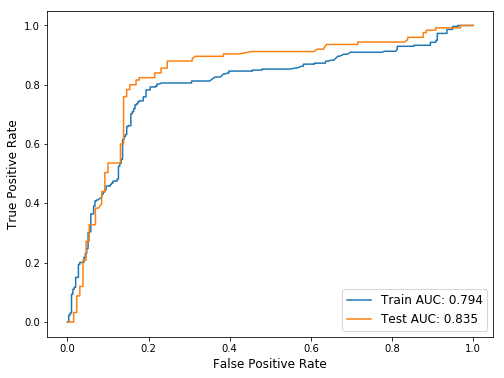

In [72]:
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

# l2 logit with sklearn 

but sklearn doesn't give you a nice output chart https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [73]:
RANDOM_STATE = 5
from sklearn.linear_model import LogisticRegression
clf_logistic_l2 = LogisticRegression(penalty = 'l2', random_state = RANDOM_STATE, ).fit(X_train, y_train)
# print_evaluation(clf_logistic_l2, X_test, y_test)

In [74]:
from sklearn import metrics

def return_evaluation(model, test_features, test_labels, cutoff = 0.5):
  predictions = model.predict_proba(test_features)
  probability_for_1 = [i[1] for i in predictions]
  classification = [ i >= cutoff for i in probability_for_1 ]

  false_positive = [(classification[i] == 1) & (test_labels[i] == 0) for i in range(len(classification))]
  false_negative = [(classification[i] == 0) & (test_labels[i] == 1) for i in range(len(classification))]
  true_positive = [(classification[i] == 1) & (test_labels[i] == 1) for i in range(len(classification))]

  accuracy = model.score(test_features, test_labels)
  precision = sum(true_positive)/round(sum(classification))
  recall = sum(true_positive)/round(sum(test_labels))
  f_score = 2/(1/recall + 1/precision)
  
  fpr, tpr, thresholds = metrics.roc_curve(test_labels, probability_for_1,)
  auc = metrics.auc(fpr, tpr)

  return(accuracy, precision, recall, f_score, auc)

def print_evaluation(model, test_features, test_labels, cutoff = 0.5):
  (accuracy, precision, recall, f_score, auc) = return_evaluation(model, test_features, test_labels, cutoff)
    
  print('Model Performance')
  print('accuracy: {:0.4f} '.format(accuracy))
  print('precision = {:0.4f}.'.format(precision))
  print('recall = {:0.4f}.'.format(recall))
  print('f1 score = {:0.4f}.'.format(f_score))
  print('AUC = {:0.4f}.'.format(auc))  
    
  pass

In [75]:
print_evaluation(clf_logistic_l2, X_test, y_test)

Model Performance
accuracy: 0.8078 
precision = 0.7639.
recall = 0.8800.
f1 score = 0.8178.
AUC = 0.8830.


In [76]:
clf_logistic_l2.coef_

array([[-1.29377396, -0.62506148, -0.45346263,  0.0071568 , -2.28195054,
        -0.44956749,  0.0481706 ]])

## l1 logit with sklearn

In [77]:
RANDOM_STATE = 5
clf_logistic_l1 = LogisticRegression(penalty = 'l1', random_state = RANDOM_STATE, ).fit(X_train, y_train)
# print_evaluation(clf_logistic_l2, X_test, y_test)

In [78]:
print_evaluation(clf_logistic_l1, X_test, y_test)

Model Performance
accuracy: 0.8078 
precision = 0.7603.
recall = 0.8880.
f1 score = 0.8192.
AUC = 0.8825.


## random forest

In [79]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.88      0.75      0.81       130
          1       0.77      0.90      0.83       125

avg / total       0.83      0.82      0.82       255



In [81]:
confusion_matrix(y_test, y_pred)

array([[ 97,  33],
       [ 13, 112]])

In [86]:
# feature importance
list(zip(df_upsampled.columns[1:]
         , clf.feature_importances_))


[('Pclass', 0.17248608469173626),
 ('Age', 0.36913251277761794),
 ('SibSp', 0.08260558538696566),
 ('Parch', 0.05423974563968135),
 ('male', 0.2972806132361773),
 ('Q', 0.009973221095795314),
 ('S', 0.014282237172026188)]

# cross validation

In [93]:
from sklearn import metrics, cross_validation
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

predicted = cross_validation.cross_val_predict(model, X, y, cv=5) # it's not clear how to adjust the threshold
scores = cross_val_score(model, X, y, cv=5, scoring = 'f1') # choices: f1, precision, recall etc
# len(predicted)
print(metrics.classification_report(y, predicted))
print(scores)

             precision    recall  f1-score   support

          0       0.82      0.81      0.81       424
          1       0.81      0.82      0.82       424

avg / total       0.81      0.81      0.81       848

[0.82022472 0.84023669 0.77108434 0.82840237 0.81437126]


In [91]:
model = LogisticRegression(penalty = 'l1')
predicted = cross_validation.cross_val_predict(model, X, y, cv=5)
# print metrics.accuracy_score(y, predicted)
scores = cross_val_score(model, X, y, cv=5, scoring = 'f1') # choices: f1, precision, recall etc
print(metrics.classification_report(y, predicted))
print(scores)

             precision    recall  f1-score   support

          0       0.82      0.81      0.82       424
          1       0.81      0.82      0.82       424

avg / total       0.82      0.82      0.82       848

[0.82022472 0.84705882 0.76646707 0.83832335 0.80952381]


In [92]:
model = RandomForestClassifier(n_jobs=2, random_state=0)
predicted = cross_validation.cross_val_predict(model, X, y, cv = 5)
scores = cross_val_score(model, X, y, cv=5, scoring = 'f1') # choices: f1, precision, recall etc
print(metrics.classification_report(y, predicted))
print(scores)

             precision    recall  f1-score   support

          0       0.85      0.80      0.83       424
          1       0.81      0.86      0.84       424

avg / total       0.83      0.83      0.83       848

[0.86187845 0.80924855 0.81142857 0.87058824 0.83428571]
